In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
datos = pd.read_csv('C:\master\dataset.csv')

In [4]:
datos['date'] = pd.to_datetime(datos['date'])

In [5]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
LE.fit(datos["Shift"])
list(LE.classes_)

['Afternoon', 'Morning', 'Night']

In [6]:
datos["Shift"] = LE.transform(datos["Shift"])
datos["Shift"].value_counts()

0    279847
1    277391
2    267349
Name: Shift, dtype: int64

In [7]:
datos.head()

,GridID,date,Shift,Accident,Longitude.grid,Latitude.grid
0,1,2010-10-08,2,0,2.08,41.41
1,1,2011-02-16,1,0,2.08,41.41
2,1,2014-05-31,2,0,2.08,41.41
3,1,2011-04-03,0,0,2.08,41.41
4,1,2013-02-20,1,0,2.08,41.41


In [8]:
from datetime import datetime, date, time, timedelta
import calendar

In [9]:
Week_Day = []
for fecha in datos['date']:
    dia_semana = datetime.weekday(fecha)+1
    Week_Day.append(dia_semana)
    
datos['Week.Day'] = Week_Day
del Week_Day

In [10]:
#Season = []
#for fecha in datos['date']:
#    mes = datetime.strftime(fecha, '%Y-%m-%d').split("-")
#    mes = int(mes[1])
#    if (mes >= 1 and mes <= 3):
#        Season.append('Winter')
#    if (mes >= 4 and mes <= 6) :
#        Season.append('Spring')
#    if (mes >= 7 and mes <= 9) :
#        Season.append('Summer')
#    if (mes >= 10 and mes <= 12) :
#        Season.append('Fall')
#    
#datos['Season'] = Season   
#del Season


Estaciones empeora, intentamos algo mas sencillo

In [11]:
Season = []
for fecha in datos['date']:
    mes = datetime.strftime(fecha, '%Y-%m-%d').split("-")
    mes = int(mes[1])
    if (mes >= 1 and mes <= 3):
        Season.append('Cold')
    if (mes >= 4 and mes <= 6) :
        Season.append('Hot')
    if (mes >= 7 and mes <= 9) :
        Season.append('Hot')
    if (mes >= 10 and mes <= 12) :
        Season.append('Cold')
    
datos['Season'] = Season   
del Season

In [12]:
datos.head()

,GridID,date,Shift,Accident,Longitude.grid,Latitude.grid,Week.Day,Season
0,1,2010-10-08,2,0,2.08,41.41,5,Cold
1,1,2011-02-16,1,0,2.08,41.41,3,Cold
2,1,2014-05-31,2,0,2.08,41.41,6,Hot
3,1,2011-04-03,0,0,2.08,41.41,7,Hot
4,1,2013-02-20,1,0,2.08,41.41,3,Cold


In [13]:
LE = LabelEncoder()
LE.fit(datos["Season"])
list(LE.classes_)
datos["Season"] = LE.transform(datos["Season"])
datos["Season"].value_counts()

0    412528
1    412059
Name: Season, dtype: int64

In [14]:
datos.head()

,GridID,date,Shift,Accident,Longitude.grid,Latitude.grid,Week.Day,Season
0,1,2010-10-08,2,0,2.08,41.41,5,0
1,1,2011-02-16,1,0,2.08,41.41,3,0
2,1,2014-05-31,2,0,2.08,41.41,6,1
3,1,2011-04-03,0,0,2.08,41.41,7,1
4,1,2013-02-20,1,0,2.08,41.41,3,0


In [15]:
datos["Type.Day"] = datos["Week.Day"].apply(lambda x: 'workday' if x<6 else 'weekend')

In [16]:
datos.head()

,GridID,date,Shift,Accident,Longitude.grid,Latitude.grid,Week.Day,Season,Type.Day
0,1,2010-10-08,2,0,2.08,41.41,5,0,workday
1,1,2011-02-16,1,0,2.08,41.41,3,0,workday
2,1,2014-05-31,2,0,2.08,41.41,6,1,weekend
3,1,2011-04-03,0,0,2.08,41.41,7,1,weekend
4,1,2013-02-20,1,0,2.08,41.41,3,0,workday


In [17]:
LE.fit(datos["Type.Day"])
list(LE.classes_)

['weekend', 'workday']

In [18]:
datos["Type.Day"] = LE.transform(datos["Type.Day"])
datos["Type.Day"].value_counts()

1    591925
0    232662
Name: Type.Day, dtype: int64

In [19]:
datos.drop('Week.Day',1)

,GridID,date,Shift,Accident,Longitude.grid,Latitude.grid,Season,Type.Day
0,1,2010-10-08,2,0,2.0800,41.4100,0,1
1,1,2011-02-16,1,0,2.0800,41.4100,0,1
2,1,2014-05-31,2,0,2.0800,41.4100,1,0
3,1,2011-04-03,0,0,2.0800,41.4100,1,0
4,1,2013-02-20,1,0,2.0800,41.4100,0,1
5,1,2013-05-05,1,0,2.0800,41.4100,1,0
6,1,2012-10-08,2,0,2.0800,41.4100,0,1
7,1,2012-07-16,0,0,2.0800,41.4100,1,1
8,1,2011-11-27,2,0,2.0800,41.4100,0,0
9,1,2011-01-03,0,0,2.0800,41.4100,0,1


In [20]:
datos.head()

,GridID,date,Shift,Accident,Longitude.grid,Latitude.grid,Week.Day,Season,Type.Day
0,1,2010-10-08,2,0,2.08,41.41,5,0,1
1,1,2011-02-16,1,0,2.08,41.41,3,0,1
2,1,2014-05-31,2,0,2.08,41.41,6,1,0
3,1,2011-04-03,0,0,2.08,41.41,7,1,0
4,1,2013-02-20,1,0,2.08,41.41,3,0,1


In [21]:
festivos = ('1-1','6-1','19-4','22-4','1-05','10-6','24-6','15-8','11-9','24-9','12-10','1-11','6-12','8-12','25-12','26-12')

In [22]:
festive = []
for fecha in datos['date']:
    pasat = False
    for festivo in festivos:
        aux = festivo.split("-")
        aux2 = datetime.strftime(fecha, '%Y-%m-%d').split("-")
        if ( (aux2[1] == aux[1]) and (aux2[2] == aux[0]) and (pasat == False) ):
            festive.append(1)
            pasat = True
    if (pasat == False):
        festive.append(0)

datos['Festive'] = festive
del festive
del festivos

In [23]:
datos.head()

,GridID,date,Shift,Accident,Longitude.grid,Latitude.grid,Week.Day,Season,Type.Day,Festive
0,1,2010-10-08,2,0,2.08,41.41,5,0,1,0
1,1,2011-02-16,1,0,2.08,41.41,3,0,1,0
2,1,2014-05-31,2,0,2.08,41.41,6,1,0,0
3,1,2011-04-03,0,0,2.08,41.41,7,1,0,0
4,1,2013-02-20,1,0,2.08,41.41,3,0,1,0


In [24]:
datos['Festive'].value_counts()

0    817881
1      6706
Name: Festive, dtype: int64

In [25]:
datos.loc[datos['Week.Day'] > 6, 'Festive'] = 1 

In [26]:
datos.head()

,GridID,date,Shift,Accident,Longitude.grid,Latitude.grid,Week.Day,Season,Type.Day,Festive
0,1,2010-10-08,2,0,2.08,41.41,5,0,1,0
1,1,2011-02-16,1,0,2.08,41.41,3,0,1,0
2,1,2014-05-31,2,0,2.08,41.41,6,1,0,0
3,1,2011-04-03,0,0,2.08,41.41,7,1,0,1
4,1,2013-02-20,1,0,2.08,41.41,3,0,1,0


In [27]:
weekend = []
for dia in datos['Week.Day']:
    if dia > 5:
        weekend.append(1)
    else:
        weekend.append(0)
   
datos['Weekend'] = weekend
del weekend

In [28]:
datos['Weekend'].value_counts()

0    591925
1    232662
Name: Weekend, dtype: int64

In [29]:
datos.head()

,GridID,date,Shift,Accident,Longitude.grid,Latitude.grid,Week.Day,Season,Type.Day,Festive,Weekend
0,1,2010-10-08,2,0,2.08,41.41,5,0,1,0,0
1,1,2011-02-16,1,0,2.08,41.41,3,0,1,0,0
2,1,2014-05-31,2,0,2.08,41.41,6,1,0,0,1
3,1,2011-04-03,0,0,2.08,41.41,7,1,0,1,1
4,1,2013-02-20,1,0,2.08,41.41,3,0,1,0,0


In [30]:
import seaborn as sns

In [31]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

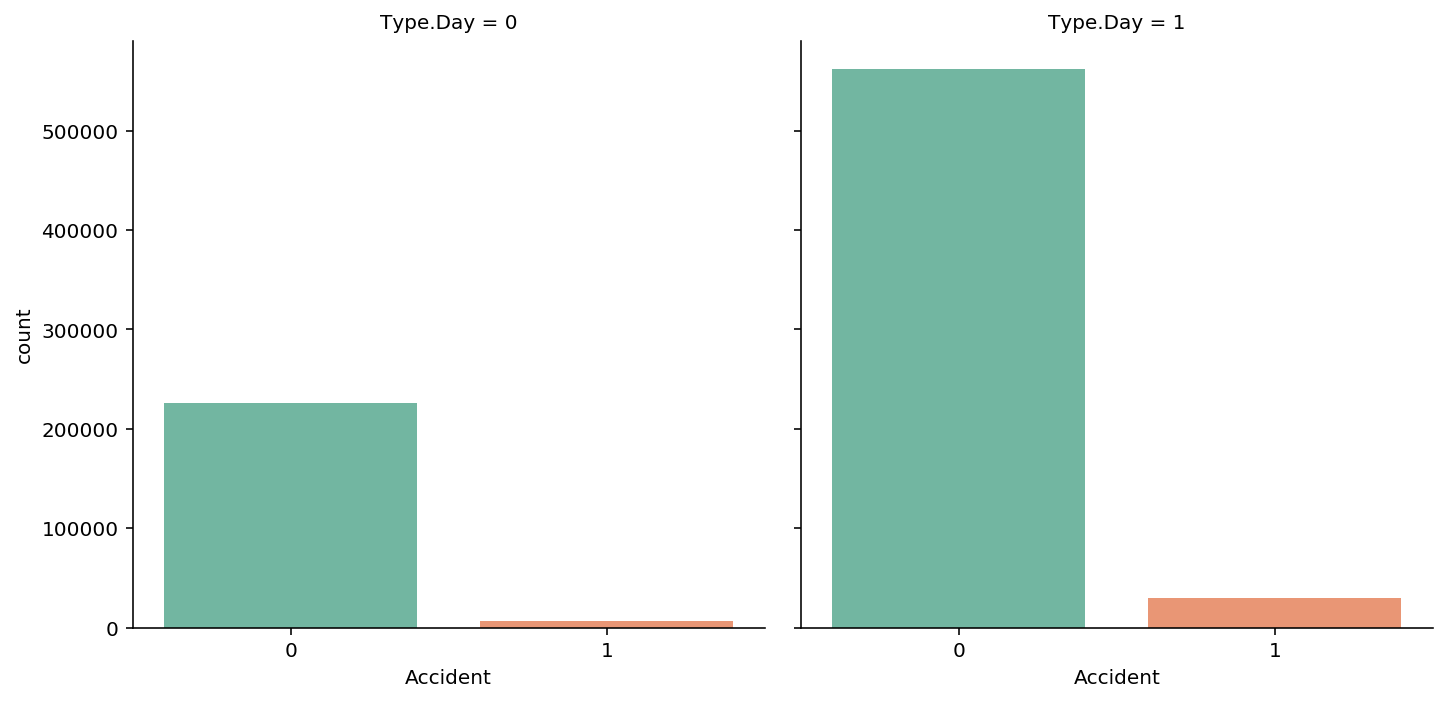

In [32]:
sns.catplot(x="Accident", col="Type.Day",data=datos, palette="Set2", kind="count")

Los datos los tenemos preparados por dias laborables y fines de semana, vemos dos cosas, hay mas datos de dias laborables
y hay mas accidentes en dias laborables como vimos anteriormente.

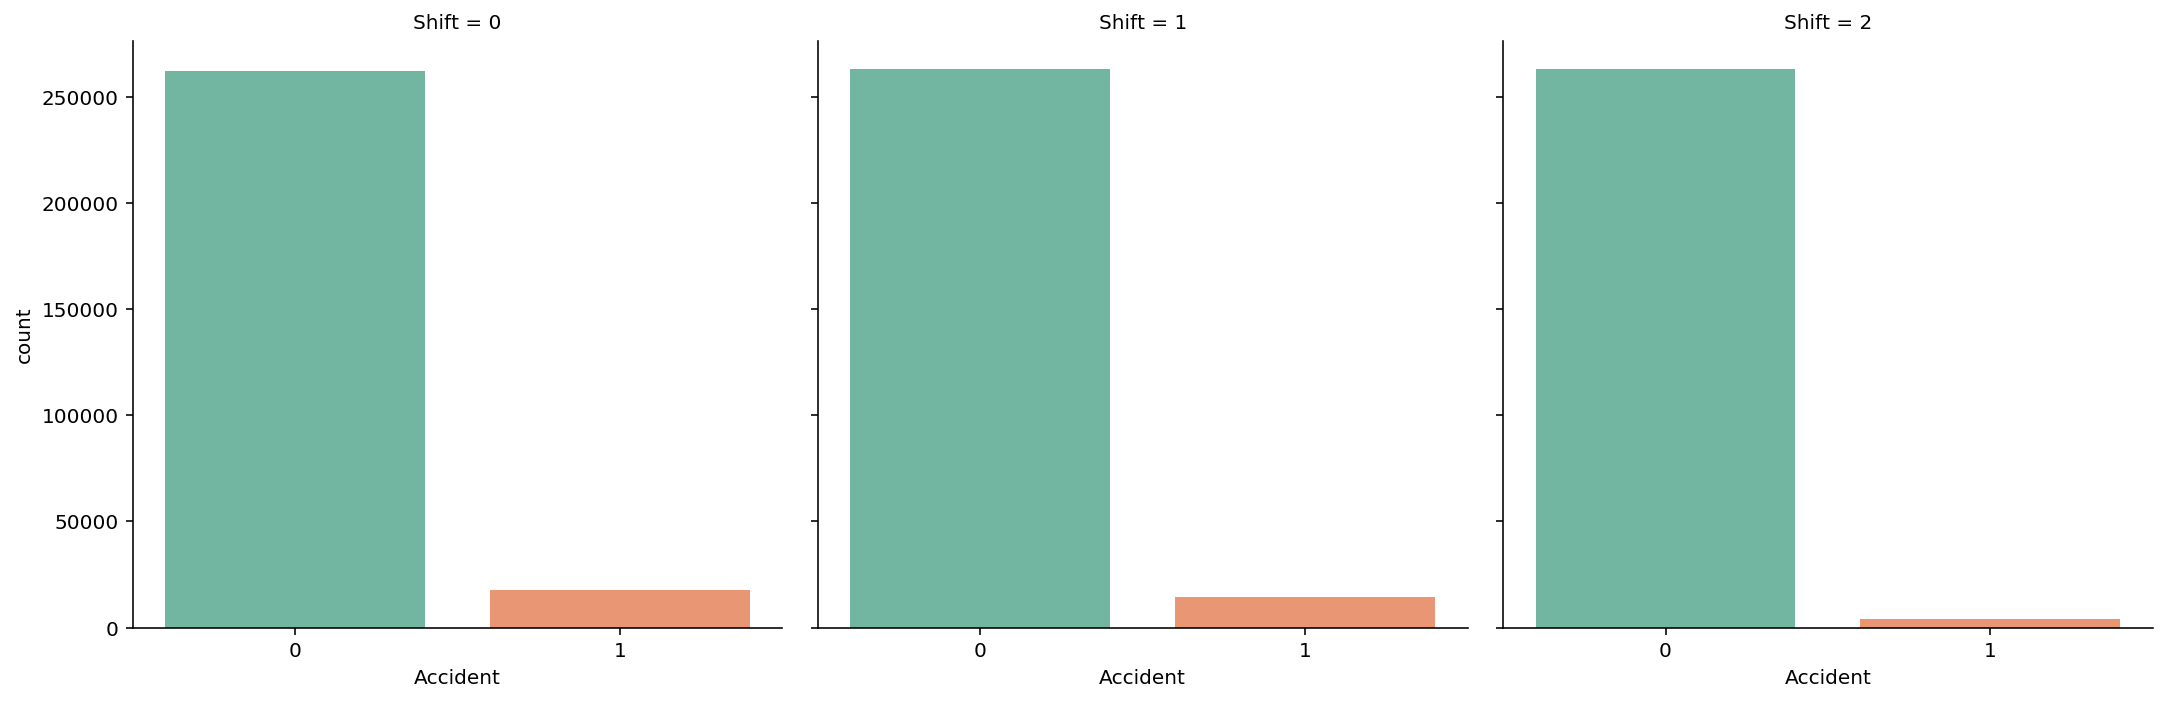

In [33]:
sns.catplot(x="Accident", col="Shift",data=datos, palette="Set2", kind="count")

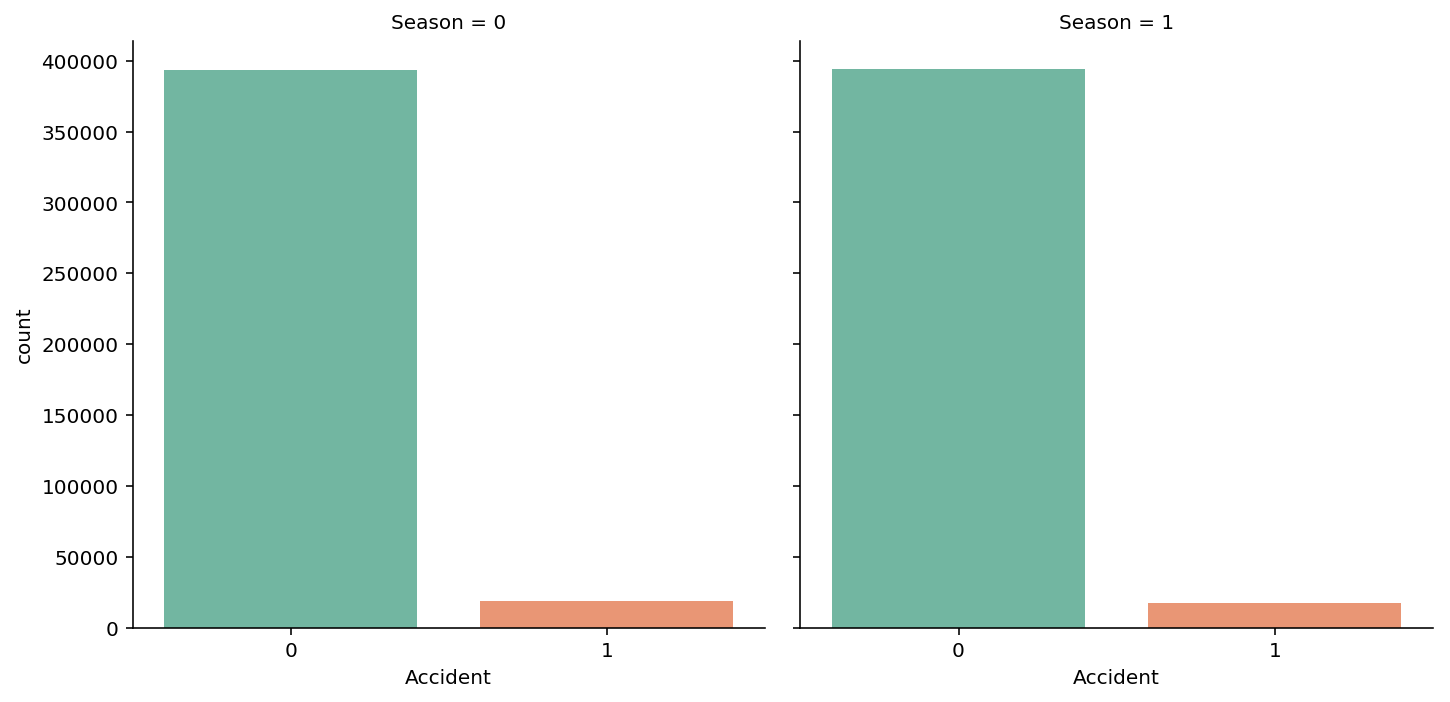

In [34]:
sns.catplot(x="Accident", col="Season",data=datos, palette="Set2", kind="count")

# Árbol decisiones

In [35]:
X = datos.drop("Accident",1)
X = X.drop("date",1)

In [36]:
y = datos["Accident"]

In [37]:
print(X.shape)
print(y.shape)

(824587, 9)
(824587,)


In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.30, random_state=1)

In [39]:
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)

(577210, 9)
(247377, 9)
(577210,)
(247377,)


In [40]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier(criterion='entropy', random_state=1)

In [41]:
DTC.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [42]:
y_train_pred = DTC.predict_proba(X_train)

In [43]:
from sklearn.metrics import roc_auc_score

In [44]:
print(roc_auc_score(y_train, y_train_pred[:, 1]), "Árbol de decisión - Datos de entrenamiento")

0.9168977095414259 Árbol de decisión - Datos de entrenamiento


In [45]:
y_test_pred = DTC.predict_proba(X_test)

In [46]:
print(roc_auc_score(y_test, y_test_pred[:, 1]), "Árbol de decisión - Datos de test")

0.6866194904537968 Árbol de decisión - Datos de test
